In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
ds = pd.read_csv('titanic_clean1.csv')
ds

,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gen_male,Survived
0,3,22.000000,1,0,7.2500,0,0,1,0
1,1,38.000000,1,0,71.2833,1,1,0,1
2,3,26.000000,0,0,7.9250,0,2,0,1
3,1,35.000000,1,0,53.1000,0,1,0,1
4,3,35.000000,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1304,3,32.252151,0,0,8.0500,0,0,1,1
1305,1,39.000000,0,0,108.9000,1,1,0,0
1306,3,38.500000,0,0,7.2500,0,0,1,1
1307,3,32.252151,0,0,8.0500,0,0,1,1


## Check Null values

In [3]:
ds.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
Gen_male    0
Survived    0
dtype: int64

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Age       1309 non-null   float64
 2   SibSp     1309 non-null   int64  
 3   Parch     1309 non-null   int64  
 4   Fare      1309 non-null   float64
 5   Embarked  1309 non-null   int64  
 6   Title     1309 non-null   int64  
 7   Gen_male  1309 non-null   int64  
 8   Survived  1309 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 92.2 KB


In [5]:
ds.describe()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gen_male,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,29.896894,0.498854,0.385027,33.280206,0.394194,0.620321,0.644003,0.420168
std,0.837836,13.193803,1.041658,0.865560,51.741830,0.653499,0.795774,0.478997,0.493774
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.774238,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,3.000000,36.000000,1.000000,0.000000,31.275000,1.000000,1.000000,1.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,2.000000,2.000000,1.000000,1.000000


## Now Find Correlation

<AxesSubplot:>

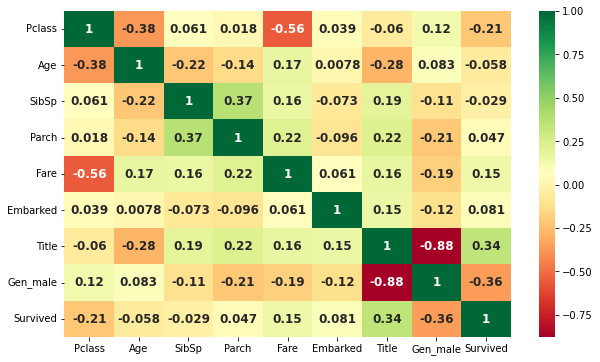

In [6]:
corrmat = ds.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,6))

sns.heatmap(ds[top_corr_features].corr(), annot=True, cmap='RdYlGn', annot_kws={"fontsize": 12, "fontweight": "bold"})

## Split data and train model

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Gen_male']
print(feature_cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Gen_male']


In [9]:
X = ds[feature_cols]
y = ds.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35)

In [10]:
X_train.shape

(850, 8)

In [11]:
from sklearn.preprocessing import StandardScaler
St_X = StandardScaler()

In [12]:
X_train = St_X.fit_transform(X_train)
X_test = St_X.fit_transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2164699769011375
Root Mean Squared Error: 0.4652633414542108
R-squared: 0.11036768095527949


In [14]:
y_pred = model.predict(X_test)
len(y_pred)

459

In [15]:
y= pd.DataFrame({'Orignal':y_test,'Predicted': y_pred})
y.head()

,Orignal,Predicted
357,0,1
229,0,1
797,1,1
792,0,1
794,0,0


In [25]:
# Create a DataFrame to compare original 'Rating' and predicted 'Rating'
y_comparison = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})
print(y_comparison.head())

     Original  Predicted
357         0       0.96
229         0       0.24
797         1       0.90
792         0       0.10
794         0       0.44
